In [83]:
%config InlineBackend.figure_format = 'retina'

# Plotting with `matplotlib`


## Why not just use Excel or Tableau?

First of all, why don't we just generate the data that we need then plot it in Excel or Tableau or something similar? You certainly can do that. However, plots created with code greatly decrease the time it takes to reproduce that plot, even if the underlying data change or adjustments need to be changed to the text and style content of the plot. This is great for sharing with others (or your future self). Beyond reproducibility, there is a great deal of customization possible with plotting using Python that is not always possible in Excel or Tableau - combining plot types, adding custom annotations, and tweaking each and every aspect of the plot regarding color, style, size, and more. Lastly, using Python tools does not rely on any proprietary tools.

## Why use `matplotlib`?

The most common way that data scientists translate the outputs from an analysis that they coded into something human-interpretable, that can present evidence clearly, tell a story based on data, and potentially compel a stakeholder into action, is through the use of plotting data. In Python, there are many tools for plotting but the most common is `matplotlib` due to its flexibility - you can construct nearly any static plot you can imaging using `matplotlib`, given sufficient patience to do so. 

Before we dive into how to use this tool, take a look at this [gallery of examples of `matplotlib`](https://matplotlib.org/stable/gallery/index.html) in action. There is no shortage of possibilities of plots including: line plots, scatter plots, bar plots, contour plots, heatmaps, image plots, quiver plots, box plots, errorbar plots, pie plots, polar plots, 3 dimensional plots, and many more. Enhancing these many types of plots is the ability to annotate plots with shapes and text, adjust colors and styles to your delight, customize legends, adjust axes, create subplots, and combine plot types to create the plot you've always been dreaming of.

The basic plotting features of `matplotlib` can be learned quickly; however, advanced plotting and customization requires a steeper learning curve. Becoming proficient with using `matplotlib` is well-worth it, since many Python data science tools and APIs use `matplotlib` as a native plotting tool, including `pandas` and `xarray`.



## Basic Plotting
Getting started with plotting using `matplotlib` is relatively simple for the most basic plots such as line plots, bar plots, and scatter plots. Let's create a quick plot of each of these. First, let's create some data to plot:

In [84]:
# Create some data to plot
x = [1, 2, 3, 4, 5]
y = [1, -2, 3, -4, 5]

Creating the plot is simple: after we've imported the `pyplot` module from the `matplotlib` package, we can use it to create a figure that contains a set of axes on which to place the plot, `fig, ax = plt.subplots()`, then we plot the data on the specified axes, `ax.plot(x,y)`, and finally we specify that the plot be rendered on the screen using `plt.show()`. This last item is not always required in an interactive terminal or in Jupyter notebooks, but is generally required to guarantee the plot is displayed. 

That's it! Your first plot is complete.

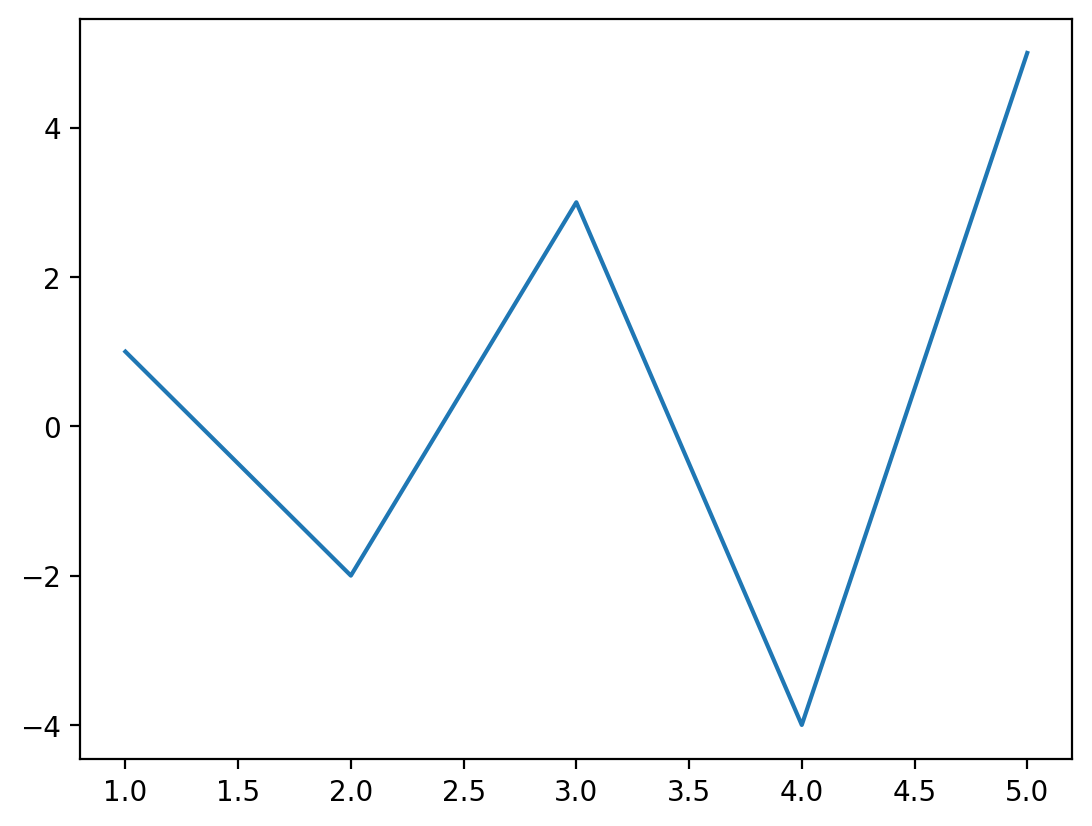

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

Following the same approach, we can create a simple bar plot and a scatter plot of the same data.

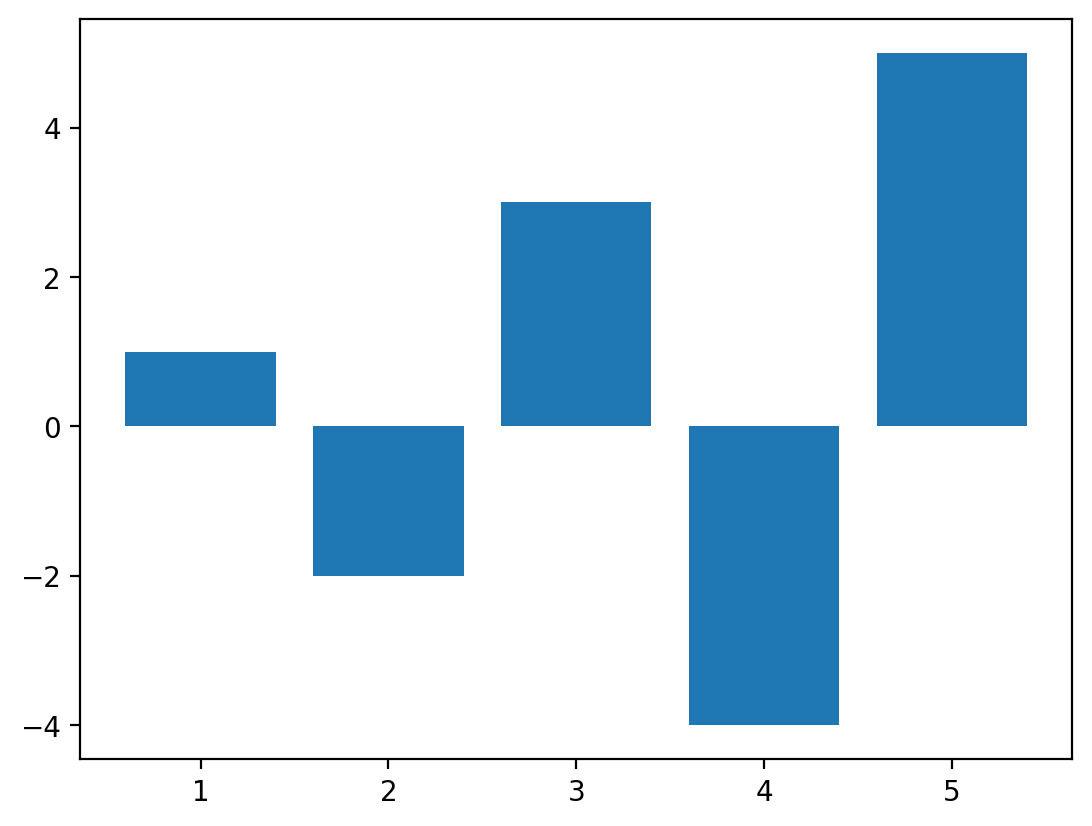

In [86]:
fig, ax = plt.subplots()
ax.bar(x, y)
plt.show()

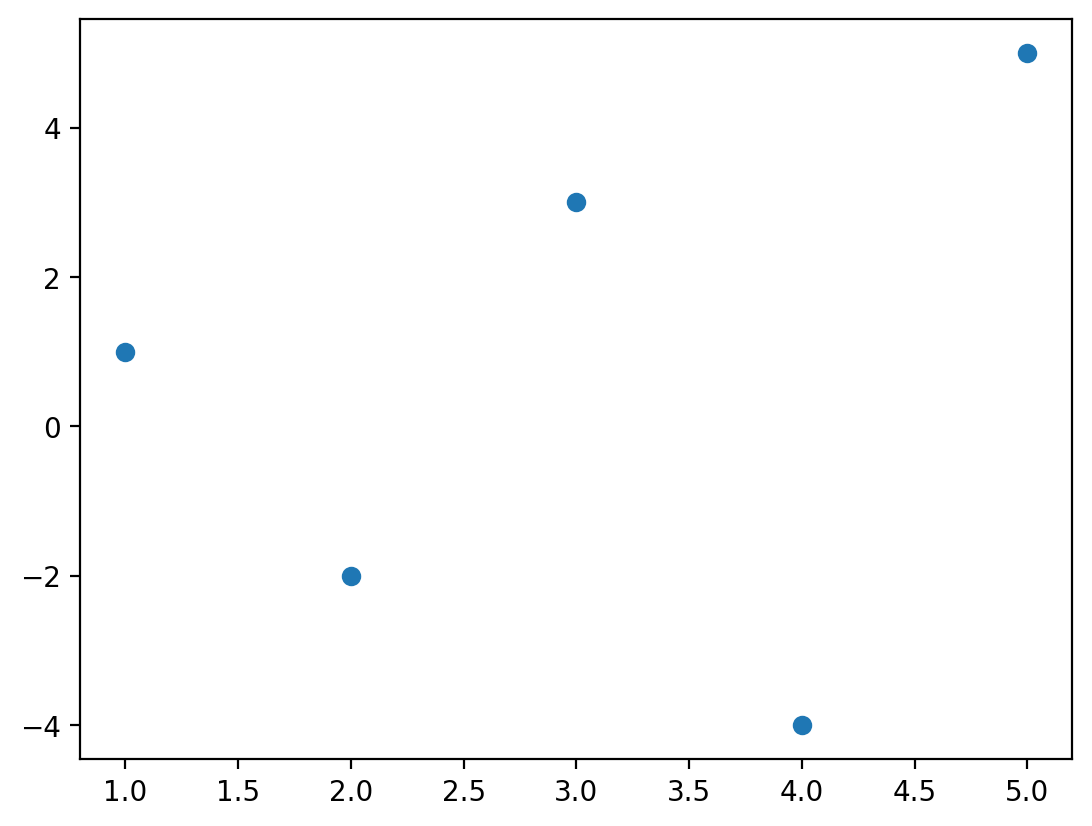

In [87]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

At it's most basic, that's all you need for plotting. Of course, these plots are missing many important things that you may want to include: axis labels, legends, grid lines, title, and more. We can customize each of these. Before we dive in to each of those, let's discuss the different components of a plot that you may want to customize and common adjustments and uses of each. The plot below (adapted from the `matplotlib` documentation) was created entirely using `matplotlib` and demonstrates the incredible customization capabilities of this tool. We'll discuss each of the items on this figure and how to customize them.

*NOTE: Don't worry if much of the plotting code below is unfamiliar - many of the tweaks that are shown here are not commonly used and all are explained in detail in the `matplotlib` documentation. We'll talk about the most important pieces to know to be able accomplish most common plotting tasks.*

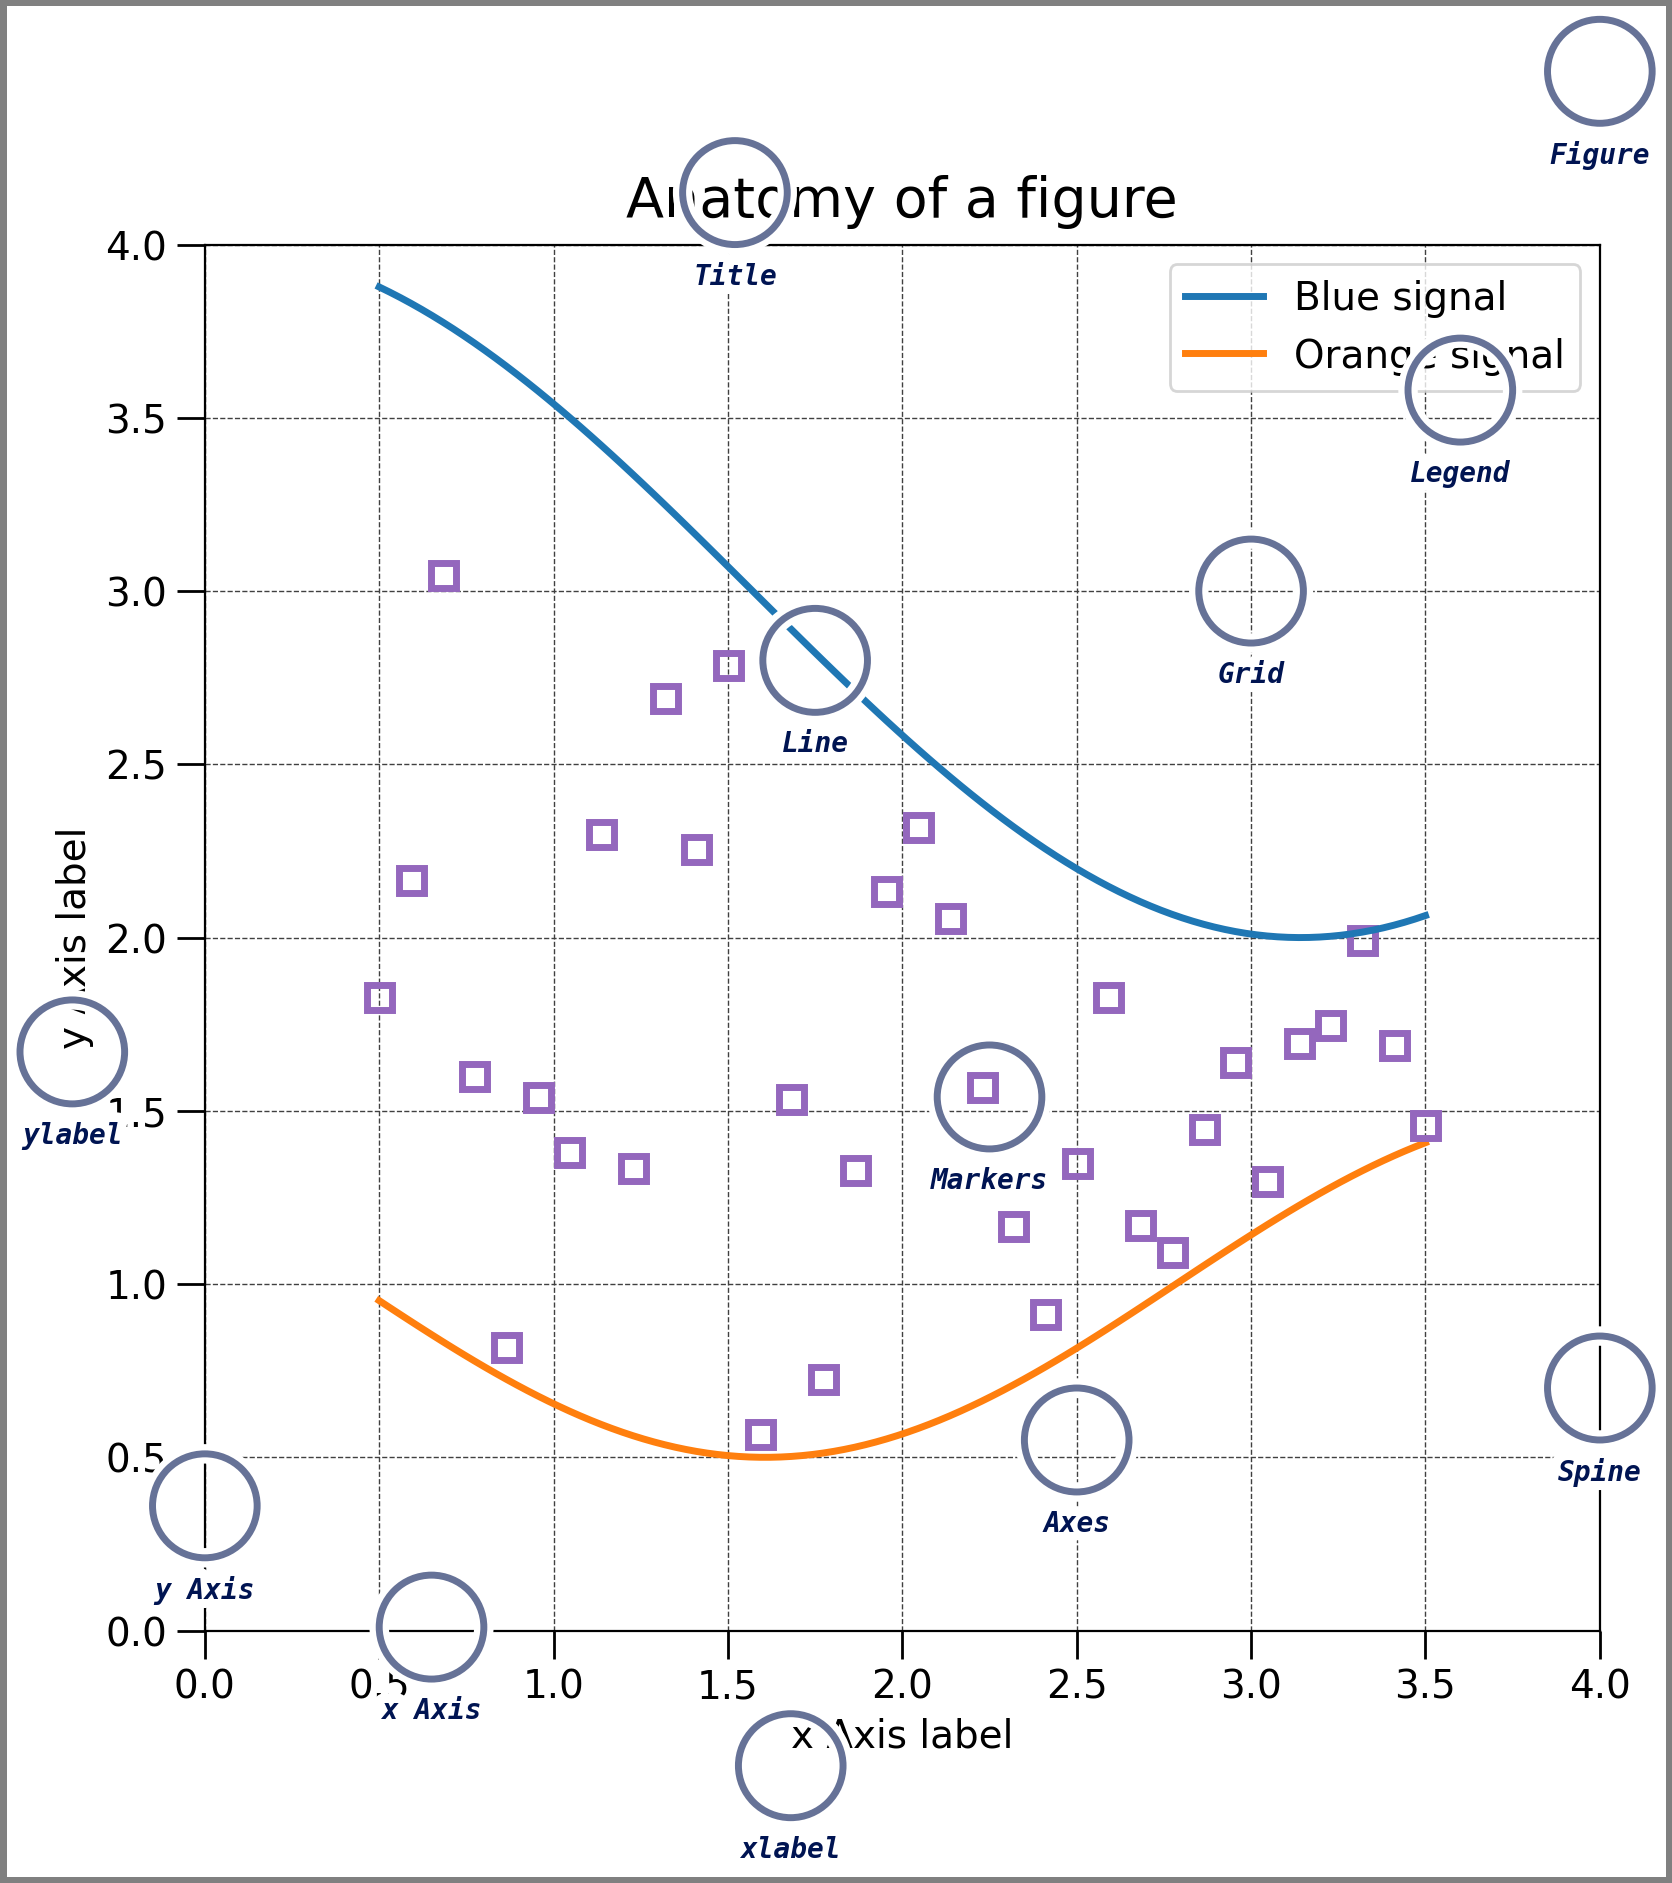

In [88]:
# ```{code-cell}
# :tags: ["hide-input"]
# ```

"""
This code was adapted from `matplotlib`'s documentation, and the original can 
be found at: https://matplotlib.org/stable/gallery/showcase/anatomy.html
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

royal_blue = [0, 20 / 256, 82 / 256]

np.random.seed(19680801)

# Create the data
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

# Make the plot
fig, ax = plt.subplots(figsize=(9, 9))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which="major", width=1.0, length=10, labelsize=14)
ax.tick_params(which="minor", width=1.0, length=5, labelsize=10, labelcolor="0.25")

ax.grid(True, linestyle="--", linewidth=0.5, color=".25", zorder=-10, which="both")

ax.plot(X, Y1, c="C0", lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c="C1", lw=2.5, label="Orange signal")
ax.plot(
    X[::3],
    Y3[::3],
    linewidth=0,
    markersize=9,
    marker="s",
    markerfacecolor="none",
    markeredgecolor="C4",
    markeredgewidth=2.5,
)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment="bottom")
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure


def annotate(x, y, text, code):
    # Circle marker
    c = Circle(
        (x, y),
        radius=0.15,
        clip_on=False,
        zorder=10,
        linewidth=2.5,
        edgecolor=royal_blue + [0.6],
        facecolor="none",
        path_effects=[withStroke(linewidth=7, foreground="white")],
    )
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground="white")], []]:
        color = "white" if path_effects else royal_blue
        ax.text(
            x,
            y - 0.2,
            text,
            zorder=100,
            ha="center",
            va="top",
            weight="bold",
            color=color,
            style="italic",
            fontfamily="monospace",
            path_effects=path_effects,
        )


annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor="0.5")
plt.show()


| Plot component | Purpose | Example of code to add or create the component |
|---|---|---|
| Figure | The container for one or more sets of axes on which plots are built | `fig, ax = plt.subplots()` |
| Axes | A canvas on which plotting happens | `fig, ax = plt.subplots()` |
| x-axis label | Label for the x axis | `ax.set_xlabel("My x-label")` |
| y-axis label | Label for the y axis | `ax.set_ylabel("My y-label")` |
| Grid | Grid line to appear behind the plot | `ax.grid(True)` |
| Title | Title of the figure | `ax.set_title("My Title")`|
| Legend | Figure legend containing lines, markers, or other symbology | `ax.legend(loc="upper right")` |
| Line | Plot representing a series of connected points | `ax.plot(x,y)` |
| Markers | Plot representing a point in a dataset | `ax.scatter(x,y, marker='s', markerfacecolor='lightgrey)` |
| Spines | The lines that make up the outer edge of the axes | `ax.spines[['right', 'top']].set_visible(False)` (this turns off the top and right spines, for example)|

Every plot is composed of a few key pieces: the figure, which contains one or more axes, and the axes themselves, onto which you can add plots that share the same axes. We can create multiple axes on the same figure by specifying how many subplots we'd like in the `subplots` method:

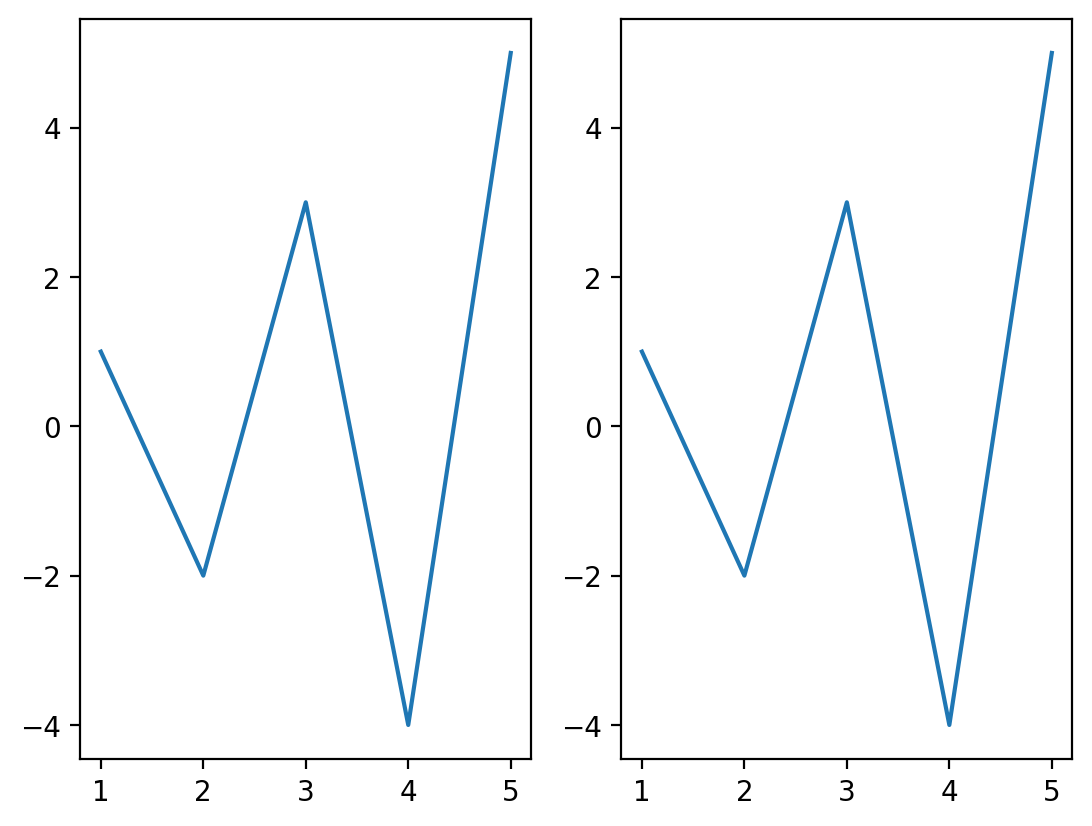

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # nrows, ncols of axes
ax1.plot(x, y)
ax2.plot(x, y)
plt.show()

Note, it's important to note the difference between axes and the x and y axis. A set of axes is the area of a figure upon which plots are built, while an axis (typically x or y) are the pieces that get ticks and labels (if you choose to include them).

With those basics out of the way, let's create a proper figure with axis labels and all. Let's add one more set of data to make it a bit more interesting as well. Let's assume we're comparing the performance of three different models: A, B, and C that are estimating the efficiency of an estimation tool over different size areas of increasing size.

In [90]:
# Create some data to plot
x = [1, 2, 3, 4, 5]
y1 = [3.64, 9.46, 16.95, 37.14, 68.22]
y2 = [22.05, 22.49, 30.65, 53.58, 47.33]
y3 = [16.82, 26.10, 49.61, 47.59, 95.82]

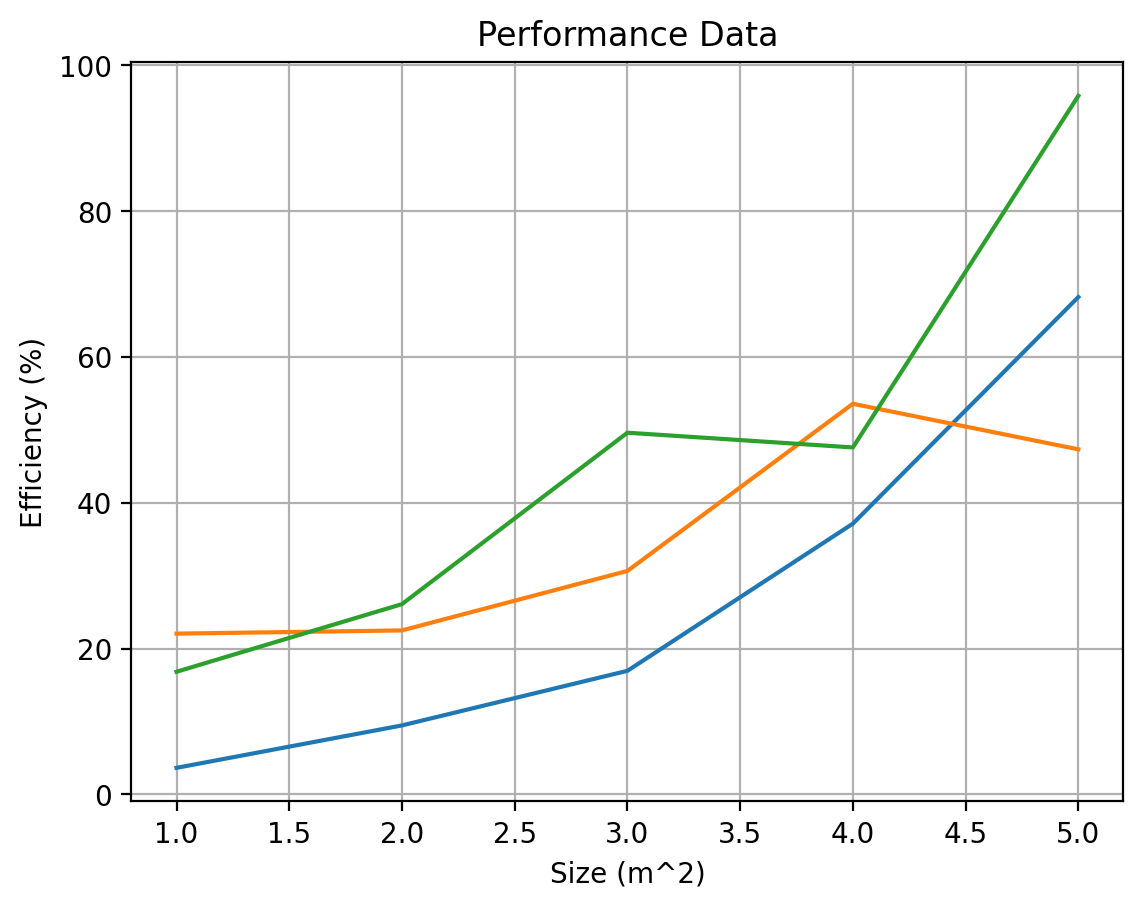

In [91]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.set_title("Performance Data")
ax.set_xlabel("Size (m^2)")
ax.set_ylabel("Efficiency (%)")
ax.grid(True)
plt.show()

Now, let's say we want to add a baseline model for comparison - one that is constant for all x values. We can do this by creating a pair of points that correspond to the baseline value; let's say the baseline value is 40. Then we want to draw a line from (1,40) to (5,40). We can do that as follows:

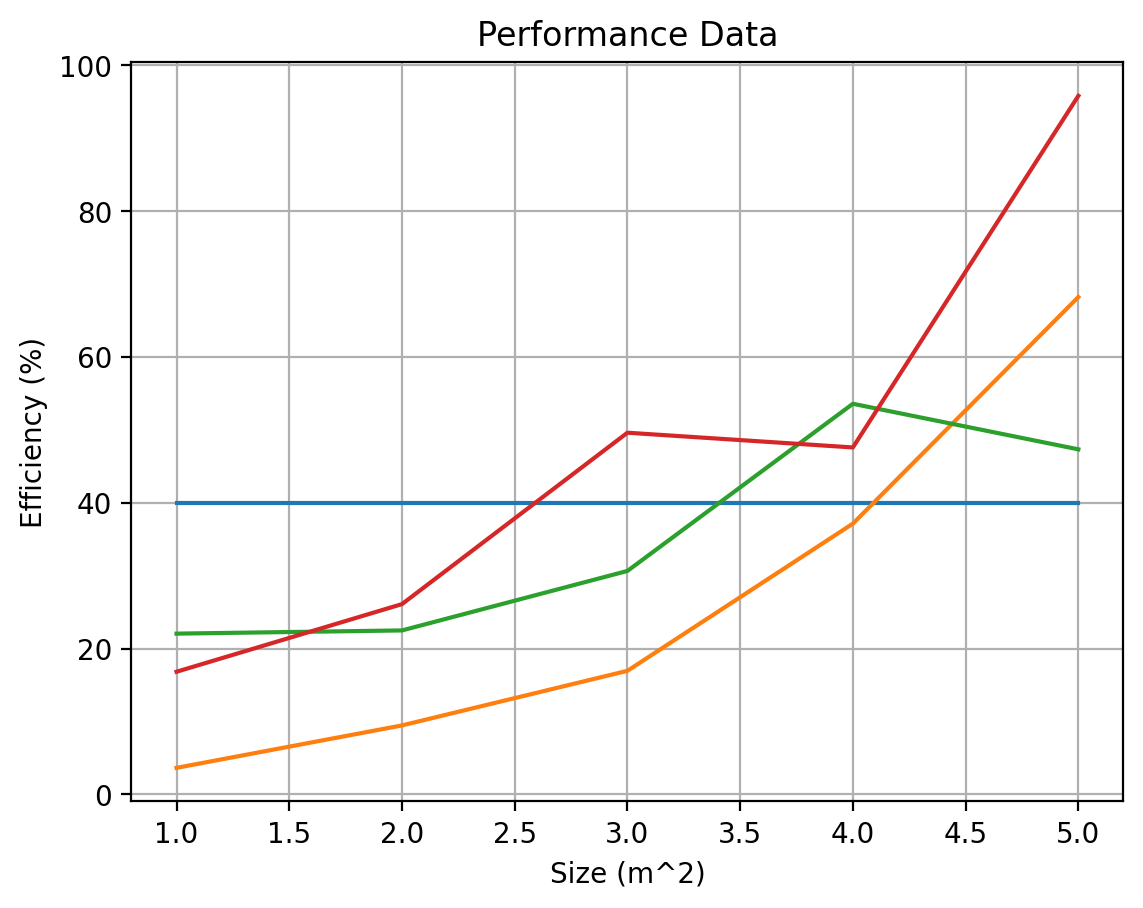

In [92]:
baseline = 40

fig, ax = plt.subplots()

ax.plot([x[0], x[-1]], [baseline, baseline])  # Plot the baseline
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)

ax.set_title("Performance Data")
ax.set_xlabel("Size (m^2)")
ax.set_ylabel("Efficiency (%)")
ax.grid(True)
plt.show()

We can add a legend by incorporating additional keyword parameter of "label" for each of the plots, to designate what these lines should each be called, then calling the `legend` method to add it to the selected axes.

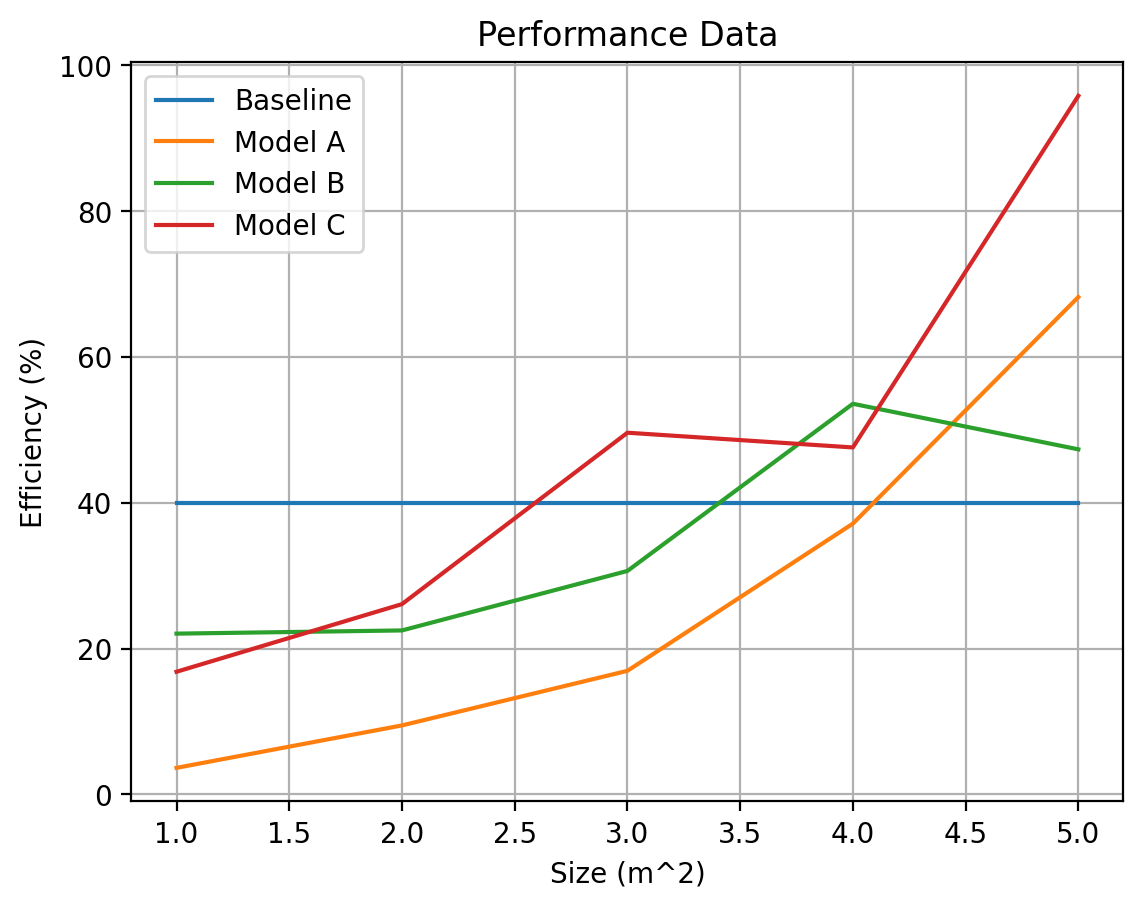

In [93]:
fig, ax = plt.subplots()

ax.plot([x[0], x[-1]], [baseline, baseline], label="Baseline")  # Plot the baseline
ax.plot(x, y1, label="Model A")
ax.plot(x, y2, label="Model B")
ax.plot(x, y3, label="Model C")

ax.set_title("Performance Data")
ax.set_xlabel("Size (m^2)")
ax.set_ylabel("Efficiency (%)")
ax.grid(True)
ax.legend()
plt.show()

Remember one of our key software engineering insights: never repeat yourself. Here, we repeat ourselves a bit when we have three plotting lines, one for each model, A, B, C. We can add one final refinement but performing this inside a loop:

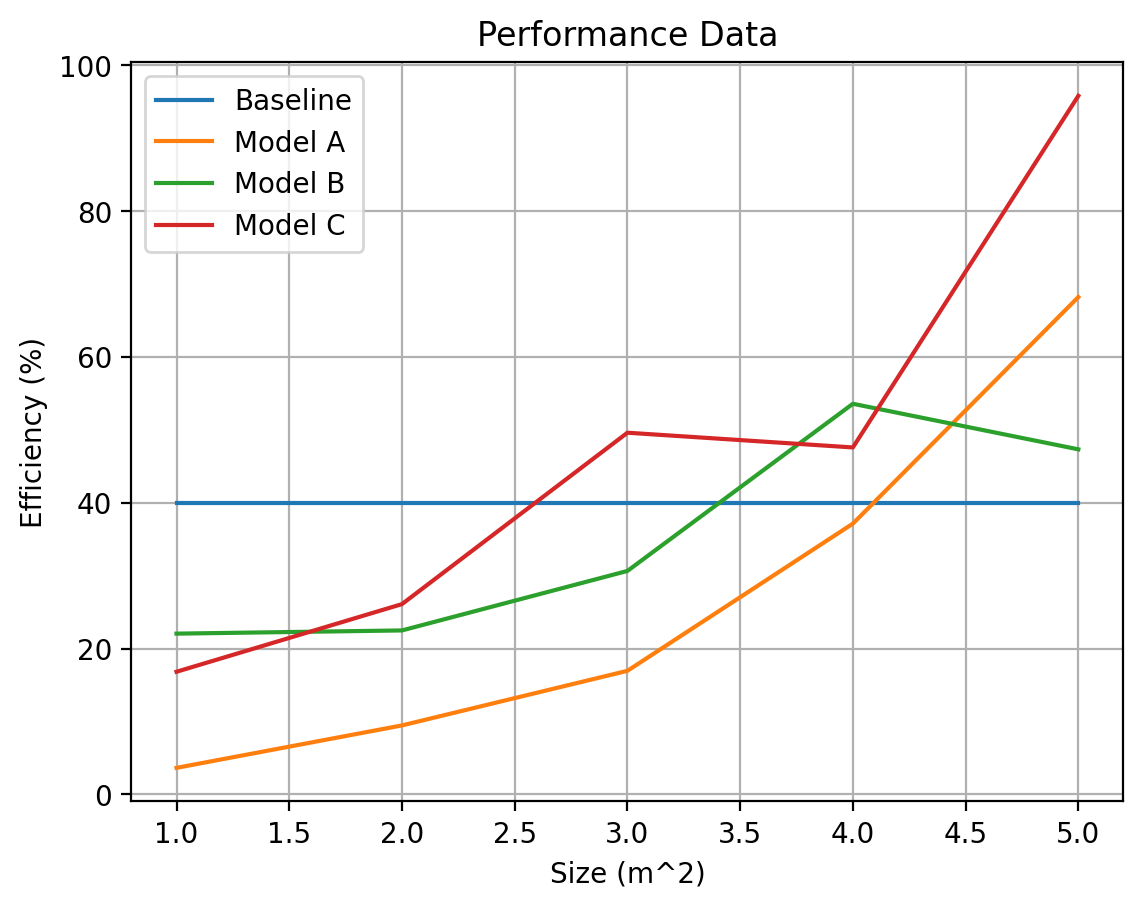

In [94]:
baseline = 40
labels = ["Model A", "Model B", "Model C"]  # Capture the labels in a list
y = [y1, y2, y3]  # Store each series of the data in one list

fig, ax = plt.subplots()

ax.plot([x[0], x[-1]], [baseline, baseline], label="Baseline")  # Plot the baseline
# Plot the three model lines
for i, label in enumerate(labels):
    plt.plot(x, y[i], label=label)

ax.set_title("Performance Data")
ax.set_xlabel("Size (m^2)")
ax.set_ylabel("Efficiency (%)")
ax.grid(True)
ax.legend()
plt.show()

Now that we've explored the basics, let's discuss some common customizations we may be interested in applying including customizing colors, linewidths, fonts, and more.